In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ksource_py as ks

In [2]:
%matplotlib inline

In [3]:
np.set_printoptions(precision=3)

/home/inti/Documents/Maestria/KSource/test/ksource_py/aux.py:26: RuntimeWarning: divide by zero encountered in log
  log_E = np.log(1E-6*E)
/home/inti/Documents/Maestria/KSource/test/ksource_py/aux.py:27: RuntimeWarning: divide by zero encountered in log
  log_H10 = np.log(1E-12*H10)


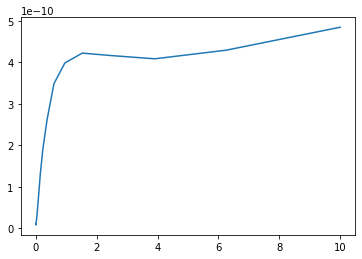

In [4]:
h10 = ks.H10Factor('n')
EE = np.logspace(-9,1,50)
hh = h10(EE)
plt.plot(EE,hh)

In [8]:
# Generar muestras artificiales

N = int(1E5)

su = 1
Es = np.exp(np.random.normal(0, 1, (N,1)))
sx = sy = 10
poss = np.random.normal([0,0,0], [10,10,0], (N,3))
sdx = sdy = .1
dirs = np.random.normal([0,0,0], [.1,.1,0], (N,3))
dirs[:,2] = np.sqrt(1-dirs[:,0]**2-dirs[:,1]**2)
parts = np.concatenate((Es,poss,dirs), axis=1)
ws = np.random.normal(1, 0.1, N)

tracks = "resampled.ssv" # "tracks.ssv"
np.savetxt(tracks, np.concatenate((parts,ws[:,np.newaxis]), axis=1))

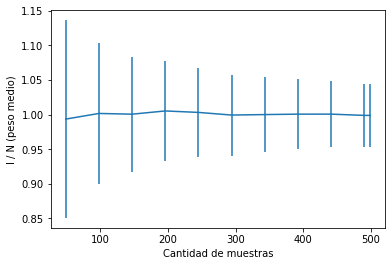

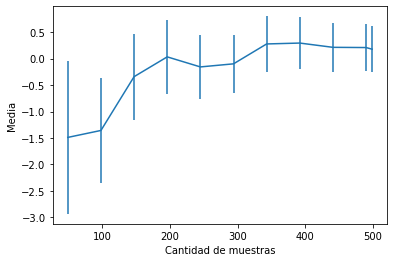

In [11]:
# Evaluar estadistica

Emin = 1e-5
dzmax = np.sqrt(1-0.01**2)
box = ks.BoxMask([Emin,None,None,None,None,None,dzmax], None)
tracks = ks.TracksStats(parts, ws, box)

N,mn,err = tracks.intensity(steps=10)
plt.show()

N,mn,err = tracks.mean(var=1, steps=10)
plt.show()

In [166]:
# Crear KSource

J = 1
set_params = True
plist = ks.PList("SSV", tracks, set_params=set_params)
metric = ks.SepVarMetric(ks.Lethargy(1), ks.SurfXY(0), ks.Isotrop())
s = ks.KSource(plist, metric, bw="silv", J=J)

Reading file resampled.ssv ...
Done
I = 10000.0
p2 = 10000.0
N = 10000


In [167]:
# Ajustar KSource

N = 1e5 # Cantidad de particulas a utilizar
s.fit(N)
s.save_bw("bw.txt")
s.bw /= 5 # Para graficos integrales puede usarse una bw mas baja

Usando 10000 particulas para entrenamiento
Calculando bw ... 
Hecho
Optimal bw (silv) = [0.368 3.736 3.705 0.031 0.031 0.031]


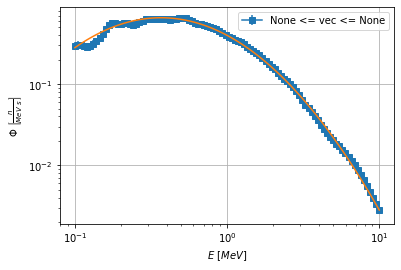

In [168]:
# Graficos en E

vec0 = None # [0, 0,0, -1,-1,-1]  # [0, -30,-30, 0.99,-180] # 
vec1 = None # [25, 500,54, 1,1,1] # [25, 30,30, 1,180]   # 
EE = np.logspace(-1,1,100)
fig,scores = s.plot_E(EE, vec0, vec1)

uu = np.log(1/EE)
plt.plot(EE, 1/EE * np.exp(-uu**2/(2*su**2))/(su*np.sqrt(2*np.pi)), zorder=3)
plt.show()

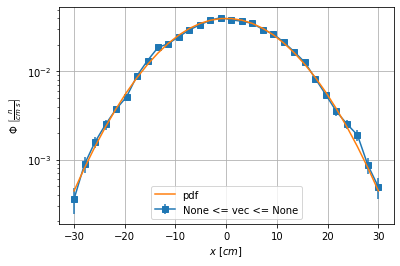

In [169]:
# Graficos en x

vec0 = None # [0, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 1,180]
xx = np.linspace(-30,30,30)
fig,scores = s.plot_integr(xx, "x", vec0, vec1)

pdf = np.exp(-(xx/sx)**2/2)/(sx*np.sqrt(2*np.pi))
plt.plot(xx, pdf, label="pdf", zorder=5)
plt.legend()
plt.show()


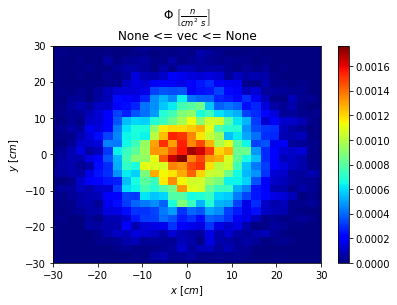

0.9310863220087144


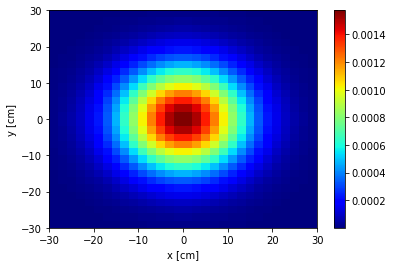

0.9309392510073546


In [170]:
# Graficos en xy

vec0 = None # [0, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 1,180]
xx = np.linspace(-30,30,30)
yy = np.linspace(-30,30,30)
fig,[scores,errs] = s.plot2D_integr([xx,yy], ["x","y"], vec0, vec1)
plt.show()
print(2*2*np.sum(scores))

xx,yy = np.meshgrid(xx,yy)
pdf = np.exp(-((xx/sx)**2+(yy/sy)**2)/2)/(sx*sy*2*np.pi)
plt.imshow(pdf, cmap='jet', extent=(-30,30,-30,30), aspect='auto')
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.colorbar()
plt.show()
print(2*2*np.sum(pdf))


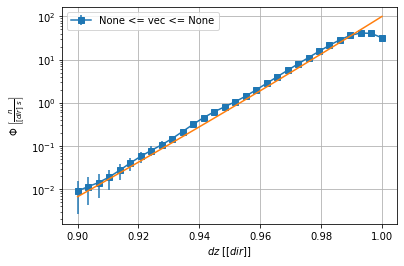

In [171]:
# Graficos en dz

vec0 = None # [20, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 1,180]
ddz = np.linspace(0.9,1,30)
fig,[scores,errs] = s.plot_integr(ddz, "dz", vec0, vec1)

ddz = ddz[:30]
ddx = np.sqrt(1-ddz**2)
pdf = 2*np.pi*ddz * np.exp(-(ddx/sdx)**2/2)/(sdx*sdy*(2*np.pi))
plt.plot(ddz, pdf, zorder=5)
plt.show()


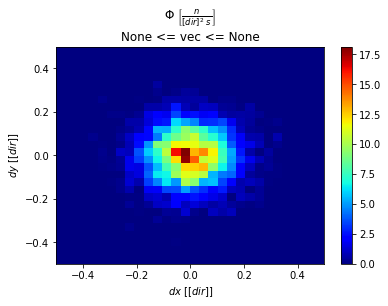

0.9353506102041995


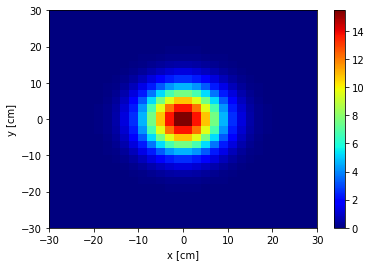

0.9344440672180359


In [172]:
# Graficos en dx-dy

vec0 = None # [0, -30,-30, 0,-180]
vec1 = None # [25, 30,30, 180,180]
ddx = np.linspace(-0.5,0.5,30)
ddy = np.linspace(-0.5,0.5,30)
fig,[scores,errs] = s.plot2D_integr([ddx,ddy], ["dx","dy"], vec0, vec1)
plt.show()
print(1/30/30*np.sum(scores))

ddx,ddy = np.meshgrid(ddx,ddy)
pdf = np.exp(-((ddx/sdx)**2+(ddy/sdy)**2)/2)/(sdx*sdy*2*np.pi)
plt.imshow(pdf, cmap='jet', extent=(-30,30,-30,30), aspect='auto')
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.colorbar()
plt.show()
print(1/30/30*np.sum(pdf))